### **Domain-Specific Area**

Fake news has become a widespread challenge in the digital era, fueled by the rapid growth of online platforms and social media. Its ability to spread quickly and shape public opinion, from influencing elections to affecting public health during crises like COVID-19, highlights the urgent need for effective solutions.

This project addresses the issue using machine learning and natural language processing (NLP) to classify news headlines based on their truthfulness. I chose this topic for its societal relevance and the opportunity it provides to explore advanced machine learning techniques while solving a real-world problem.

What draws me to this project is its intersection of computational linguistics, data science, and ethics. It’s not just about building models—it’s about using technology to foster informed decision-making and rebuild trust in credible sources. Applying NLP to analyze text patterns and detect fake news offers an exciting way to merge my academic pursuits with meaningful impact.

Through this project, I aim to contribute to a field that blends innovation with social responsibility. While this is only a small step toward a broader solution, it highlights the importance of tackling modern challenges with creative, technology-driven approaches.


### **Domain-Specific Area**

Fake news has become a widespread challenge in the digital era, fueled by the rapid growth of online platforms and social media. Its ability to spread quickly and shape public opinion, from influencing elections to affecting public health during crises like COVID-19, highlights the urgent need for effective solutions.

This project addresses the issue using machine learning and natural language processing (NLP) to classify news headlines based on their truthfulness. I chose this topic for its societal relevance and the opportunity it provides to explore advanced machine learning techniques while solving a real-world problem.

What draws me to this project is its intersection of computational linguistics, data science, and ethics. It’s not just about building models—it’s about using technology to foster informed decision-making and rebuild trust in credible sources. Applying NLP to analyze text patterns and detect fake news offers an exciting way to merge my academic pursuits with meaningful impact.

Through this project, I aim to contribute to a field that blends innovation with social responsibility. While this is only a small step toward a broader solution, it highlights the importance of tackling modern challenges with creative, technology-driven approaches.


# **Description of the Dataset**

The dataset for this project, sourced from Kaggle, is titled "Fake or Real News." It features a diverse collection of news headlines, each labeled with a category that reflects its degree of truthfulness. This dataset serves as a strong foundation for training and evaluating machine learning models in fake news detection.

### **Overview**
The dataset includes four main features:
- **`News_Headline`**: The core text of the news headline, serving as the primary input for NLP tasks. This column provides the textual data to analyze and classify.
- **`Source`**: Indicates where the news originated. While this could add context, it is not directly used in this project.
- **`Stated_On`**: The date the news was stated. Although it could offer temporal context, it is outside the scope of this project.
- **`Label`**: The truthfulness classification of each headline, categorized into six levels: `True`, `Mostly True`, `Half True`, `Barely True`, `False`, and `Pants on Fire`. These categories have been numerically encoded from `0` to `5` for modeling purposes.

### **Source**
This dataset is the **Fake and Real News** dataset from Kaggle, available at Fake/Real News Dataset: https://www.kaggle.com/datasets/techykajal/fakereal-news.

### **Size and Distribution**
The dataset comprises 9,960 labeled rows and four columns (`News_Headline`, `Source`, `Stated_On`, `Label`). A key challenge lies in the uneven class distribution; for example, categories like `False` and `True` have significantly more samples compared to `Pants on Fire`. This imbalance is addressed during preprocessing to ensure fair evaluation of the models.

### **Relevance to the Project**
This dataset is an excellent fit for the project’s goal of classifying fake news. The labeled data supports supervised learning, and by focusing on the `News_Headline` and `Label` columns, advanced NLP techniques can be applied to analyze patterns and predict truthfulness.

### **Challenges**
- **Class Imbalance**: The uneven distribution of labels could affect model performance and needs careful handling during preprocessing.
- **Text Variability**: Headlines differ in length and complexity, requiring robust preprocessing techniques like tokenization and embedding to capture their semantic meaning.

### **Data Preprocessing**
For this project, the focus is on the `News_Headline` column as the primary input and the `Label` column as the target. Preprocessing involves tokenization, vectorization, and encoding labels into numeric values. Other columns are excluded to streamline the analysis and maintain focus on headline classification.

This dataset not only provides a valuable opportunity to address fake news detection but also enables a comprehensive comparison of statistical and embedding-based models in a challenging and meaningful context.


# **Evaluation Methodology**

The evaluation methodology is a crucial aspect of this project, as it ensures the models' performance is assessed accurately and the results are reliable. A combination of established metrics and validation techniques was employed to evaluate both statistical and embedding-based models. These methods were carefully chosen to align with the goals of fake news classification and address challenges like class imbalance and text variability.

### **Metrics Used**
To assess the models, the evaluation focused on four key metrics:
- **Accuracy**: Measures the percentage of correctly classified samples across the entire dataset. While it offers a general overview, it can be less informative in imbalanced datasets.
- **Precision**: Highlights the proportion of true positives among all predicted positives, making it critical for minimizing false positives, especially in detecting fake news.
- **Recall**: Captures the model's ability to identify true positives out of all actual positives, ensuring comprehensive detection of fake news.
- **F1-Score**: Balances precision and recall, providing a robust measure for datasets with imbalanced classes.

These metrics were selected to provide a comprehensive evaluation, capturing both general accuracy and the models’ ability to handle class imbalance effectively.

### **Validation Strategy**
The dataset was split into an 80% training set and a 20% testing set. This train-test split ensured there was enough data for both phases while keeping the process computationally efficient. The validation process offered a fair comparison between the statistical models, such as Naive Bayes and Logistic Regression, and embedding-based models, such as Word2Vec and GloVe.

For embedding-based models, additional tools like ROC curves and precision-recall curves were used to analyze performance thresholds. These visualizations provided deeper insights into how well the models distinguished between classes.

### **Addressing Class Imbalance**
Since the dataset is imbalanced, weighted metrics were applied to ensure underrepresented classes were fairly evaluated. This adjustment allowed the metrics to reflect the models' performance across all categories accurately, preventing the dominance of majority classes from skewing the results.

### **Comparative Approach**
Both statistical and embedding-based models were evaluated using the same metrics to maintain consistency. Their results were compared to highlight each approach’s strengths and weaknesses, offering a clear picture of their trade-offs and overall suitability for fake news classification.

By combining these metrics and validation strategies, the evaluation methodology ensures a reliable and thorough assessment of the models. This approach not only measures effectiveness but also provides valuable insights into the challenges and opportunities in fake news detection.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, 
    roc_curve, auc, 
    precision_recall_curve, 
    accuracy_score, 
    classification_report
)

# Statistical models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Embedding-based models
from gensim.models import Word2Vec
from sklearn.neural_network import MLPClassifier

# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedwahba/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahmedwahba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<!-- # Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt') -->

In [2]:

file_path = 'New_Task.csv'
# I will Load the dataset with the appropriate encoding, because the dataset include special charachters
df = pd.read_csv(file_path, encoding='latin1')

# Load and Inspect the Dataset

In [3]:
df.head()

,News_Headline,Link_Of_News,Source,Stated_On,Date,Label
0,Says Osama bin Laden endorsed Joe Biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,https://www.politifact.com/factchecks/2020/jun...,Donald Trump,"June 18, 2020","June 19, 2020",pants-fire
2,Says Tim Tebow kneeled in protest of abortion...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",FALSE
3,Even so-called moderate Democrats like Joe Bi...,https://www.politifact.com/factchecks/2020/jun...,Paul Junge,"June 10, 2020","June 19, 2020",barely-true
4,"""Our health department, our city and our count...",https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",TRUE


In [4]:
df.isnull().sum()

News_Headline    0
Link_Of_News     0
Source           0
Stated_On        0
Date             0
Label            0
dtype: int64

### Select Relevant Columns

In [5]:
# Select relevant columns
df = df[['News_Headline', 'Source', 'Stated_On', 'Label']]

# Display the filtered dataset
df.head()

,News_Headline,Source,Stated_On,Label
0,Says Osama bin Laden endorsed Joe Biden,Donald Trump Jr.,"June 18, 2020",FALSE
1,CNN aired a video of a toddler running away fr...,Donald Trump,"June 18, 2020",pants-fire
2,Says Tim Tebow kneeled in protest of abortion...,Facebook posts,"June 12, 2020",FALSE
3,Even so-called moderate Democrats like Joe Bi...,Paul Junge,"June 10, 2020",barely-true
4,"""Our health department, our city and our count...",Jeanette Kowalik,"June 14, 2020",TRUE


### Text Cleaning

In [6]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply cleaning to the News_Headline column
df['News_Headline'] = df['News_Headline'].apply(clean_text)

# Display the updated dataset
print("Cleaned dataset preview:")
df.head()

Cleaned dataset preview:


,News_Headline,Source,Stated_On,Label
0,says osama bin laden endorsed joe biden,Donald Trump Jr.,"June 18, 2020",FALSE
1,cnn aired video toddler running away another t...,Donald Trump,"June 18, 2020",pants-fire
2,says tim tebow kneeled protest abortion nation...,Facebook posts,"June 12, 2020",FALSE
3,even socalled moderate democrats like joe bide...,Paul Junge,"June 10, 2020",barely-true
4,health department city county declared racism ...,Jeanette Kowalik,"June 14, 2020",TRUE


# Data Preparation and Preprocessing

### Encode Labels
To make the `Label` column usable for machine learning, I need to transform its categorical values into numeric ones. I'll map each label to an integer between 0 and 5, allowing the models to process the data effectively.

In [7]:
# Create a mapping for the Label column
label_mapping = {
    'FALSE': 0,
    'pants-fire': 1,
    'barely-true': 2,
    'half-true': 3,
    'mostly-true': 4,
    'TRUE': 5
}

# Apply the mapping to the Label column
df['Label'] = df['Label'].map(label_mapping)

# Display the updated dataset
df.head()


,News_Headline,Source,Stated_On,Label
0,says osama bin laden endorsed joe biden,Donald Trump Jr.,"June 18, 2020",0.0
1,cnn aired video toddler running away another t...,Donald Trump,"June 18, 2020",1.0
2,says tim tebow kneeled protest abortion nation...,Facebook posts,"June 12, 2020",0.0
3,even socalled moderate democrats like joe bide...,Paul Junge,"June 10, 2020",2.0
4,health department city county declared racism ...,Jeanette Kowalik,"June 14, 2020",5.0


### Convert Encoded Labels to Integer Data Type
To ensure the encoded labels are compatible with the machine learning models, I will convert them explicitly to the `Int64` data type.

In [8]:
# Convert Label column to integers
df['Label'] = df['Label'].astype('Int64')

# Display the updated dataset
print("Dataset after converting labels to integers:")
df.head()

Dataset after converting labels to integers:


,News_Headline,Source,Stated_On,Label
0,says osama bin laden endorsed joe biden,Donald Trump Jr.,"June 18, 2020",0
1,cnn aired video toddler running away another t...,Donald Trump,"June 18, 2020",1
2,says tim tebow kneeled protest abortion nation...,Facebook posts,"June 12, 2020",0
3,even socalled moderate democrats like joe bide...,Paul Junge,"June 10, 2020",2
4,health department city county declared racism ...,Jeanette Kowalik,"June 14, 2020",5


### Handle Missing Values in `Label` Column
I’ll check the `Label` column for any missing values. If found, I will remove the corresponding rows to maintain the integrity of the dataset.

In [9]:
# Check for NaN values in the Label column
print("Checking for NaN values in the Label column:")
print(df['Label'].isnull().sum())

# Drop rows where Label is NaN
df = df.dropna(subset=['Label'])

# Confirm no NaN values remain
print("NaN values removed. Current dataset size:", df.shape)

Checking for NaN values in the Label column:
105
NaN values removed. Current dataset size: (9855, 4)


### Visualization of Label Distribution
To understand the distribution of labels in the dataset, I created a histogram. It visually represents how often each label appears and helps identify any potential class imbalance.

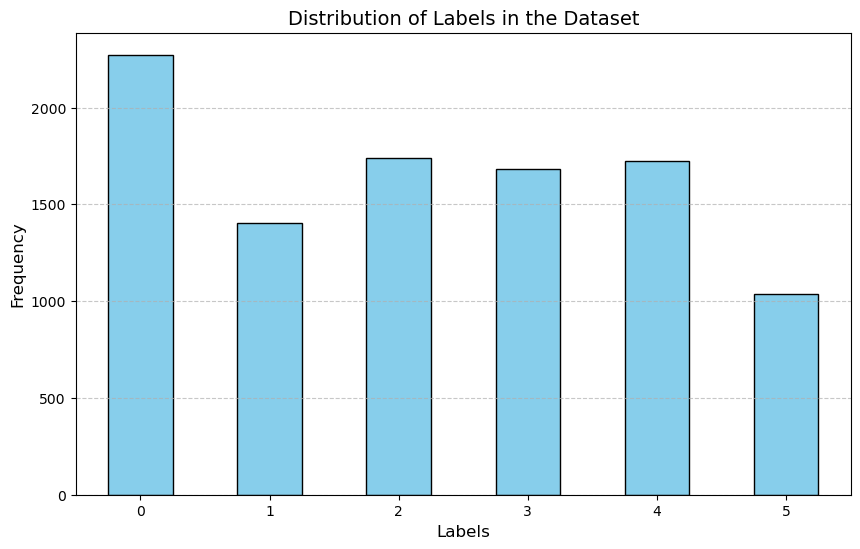

In [10]:
# Plot histogram for label distribution
plt.figure(figsize=(10, 6))
df['Label'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Distribution of Labels in the Dataset", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Baseline Model

### Split the Dataset

In [11]:
# Split the dataset into training and testing sets
X = df['News_Headline']  # Features
y = df['Label']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split completed:")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Dataset split completed:
Training samples: 7884, Testing samples: 1971


### Convert Text to TF-IDF Features

In [12]:
# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF transformation completed.")


TF-IDF transformation completed.


## Build and train the Baseline models

### Multinomial Naive Bayes
I trained the Multinomial Naive Bayes model using TF-IDF features. I chose this model because it is simple and performs well for text classification tasks, especially when the features are assumed to be independent.

In [13]:
# Train Multinomial Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

print("Multinomial Naïve Bayes model trained successfully.")


Multinomial Naïve Bayes model trained successfully.


### Logistic Regression
I trained the Logistic Regression model using the same TF-IDF features. I chose this model because it often performs well with large datasets and handles correlated features better than Naive Bayes.

In [14]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


### Evaluate Baseline model

### Evaluate Multinomial Naïve Bayes

In [15]:
# Evaluate Multinomial Naïve Bayes
nb_predictions = nb_model.predict(X_test_tfidf)
print("Naïve Bayes Performance:")
print(classification_report(y_test, nb_predictions))


Naïve Bayes Performance:
              precision    recall  f1-score   support

         0.0       0.30      0.57      0.40       466
         1.0       0.48      0.18      0.26       270
         2.0       0.22      0.15      0.18       359
         3.0       0.21      0.20      0.20       326
         4.0       0.30      0.38      0.33       340
         5.0       0.00      0.00      0.00       210

    accuracy                           0.28      1971
   macro avg       0.25      0.25      0.23      1971
weighted avg       0.26      0.28      0.25      1971



### Confusion Matrix: Naive Bayes
The confusion matrix shows the classification performance of the Naive Bayes model by detailing true positives, true negatives, false positives, and false negatives for each class. This helps uncover patterns in the model’s errors and highlights its strengths in classification.

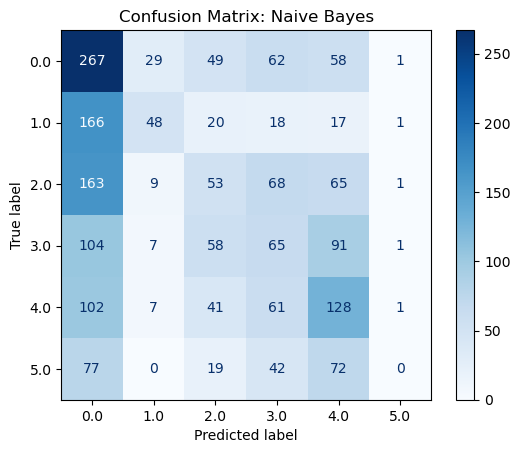

In [16]:
# Confusion Matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

### ROC Curve: Naive Bayes
The ROC curve visualizes the performance of the Naive Bayes model by plotting the true positive rate against the false positive rate. The AUC (Area Under the Curve) score measures how well the model distinguishes between classes, with a higher AUC indicating better performance.

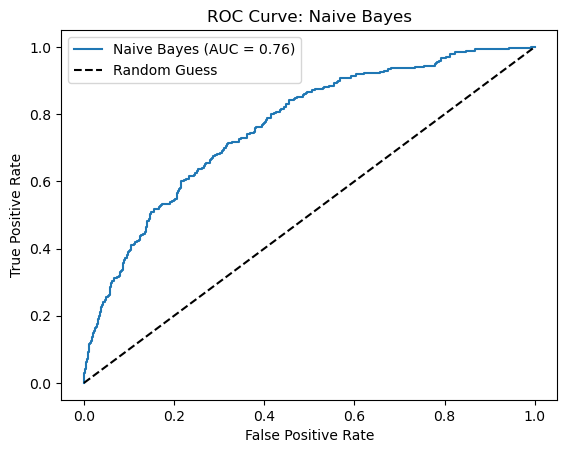

In [17]:
# ROC Curve for Naive Bayes
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_model.predict_proba(X_test_tfidf)[:, 1], pos_label=1)
nb_roc_auc = auc(nb_fpr, nb_tpr)

plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Naive Bayes")
plt.legend()
plt.show()

### Precision-Recall Curve: Naive Bayes
The Precision-Recall curve shows the balance between precision and recall for the Naive Bayes model. It is especially helpful for imbalanced datasets, as it highlights the model's ability to maintain high precision while capturing recall.

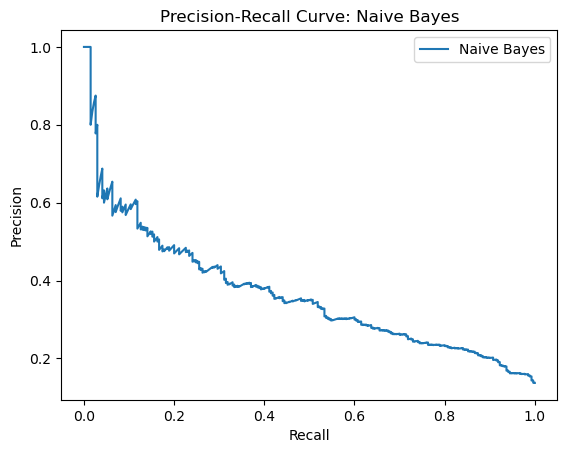

In [18]:
# Precision-Recall Curve for Naive Bayes
nb_precision, nb_recall, _ = precision_recall_curve(y_test, nb_model.predict_proba(X_test_tfidf)[:, 1], pos_label=1)

plt.plot(nb_recall, nb_precision, label="Naive Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve: Naive Bayes")
plt.legend()
plt.show()

### Evaluate Logistic Regression

In [19]:

# Evaluate Logistic Regression
lr_predictions = lr_model.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.33      0.48      0.39       466
         1.0       0.39      0.27      0.32       270
         2.0       0.24      0.20      0.22       359
         3.0       0.23      0.24      0.24       326
         4.0       0.29      0.33      0.31       340
         5.0       0.27      0.08      0.12       210

    accuracy                           0.29      1971
   macro avg       0.29      0.27      0.27      1971
weighted avg       0.29      0.29      0.28      1971



### Confusion Matrix: Logistic Regression
The confusion matrix for Logistic Regression reveals how well the model predicts each class. By analyzing the true positives, true negatives, false positives, and false negatives, we can identify the model’s strengths and weaknesses.

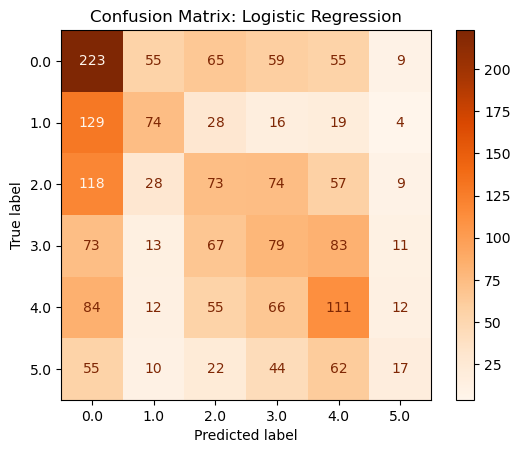

In [20]:
# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=lr_model.classes_)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

### ROC Curve: Logistic Regression
The ROC curve for Logistic Regression assesses the balance between true positive and false positive rates. The AUC score represents the model’s overall ability to differentiate between classes, with higher values reflecting better performance.

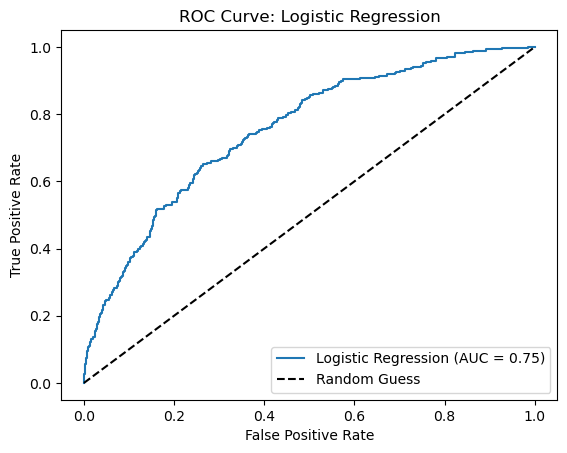

In [21]:
# ROC Curve for Logistic Regression
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_tfidf)[:, 1], pos_label=1)
lr_roc_auc = auc(lr_fpr, lr_tpr)

plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

### Precision-Recall Curve: Logistic Regression
The Precision-Recall curve for Logistic Regression illustrates the trade-offs between precision and recall at different thresholds. This is especially useful for imbalanced datasets, as it highlights the model's ability to manage these challenges effectively.

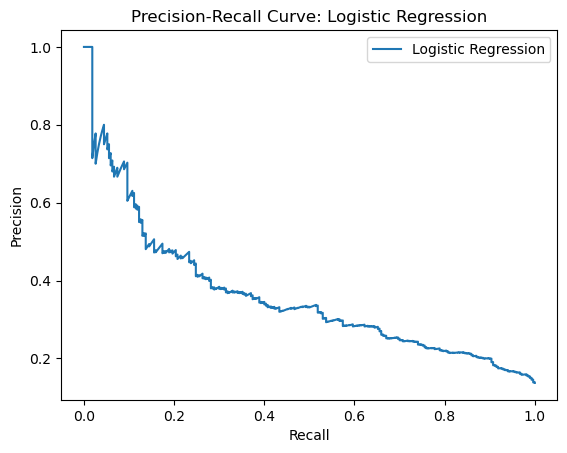

In [22]:
# Precision-Recall Curve for Logistic Regression
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_model.predict_proba(X_test_tfidf)[:, 1], pos_label=1)

plt.plot(lr_recall, lr_precision, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve: Logistic Regression")
plt.legend()
plt.show()

### Visualization: Baseline Model Performance
The bar chart compares the precision, recall, and F1-scores of the two baseline models across each class. It highlights which model performs better and identifies areas where either model struggles.

Naive Bayes Report Keys: dict_keys(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', 'accuracy', 'macro avg', 'weighted avg'])
Logistic Regression Report Keys: dict_keys(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', 'accuracy', 'macro avg', 'weighted avg'])


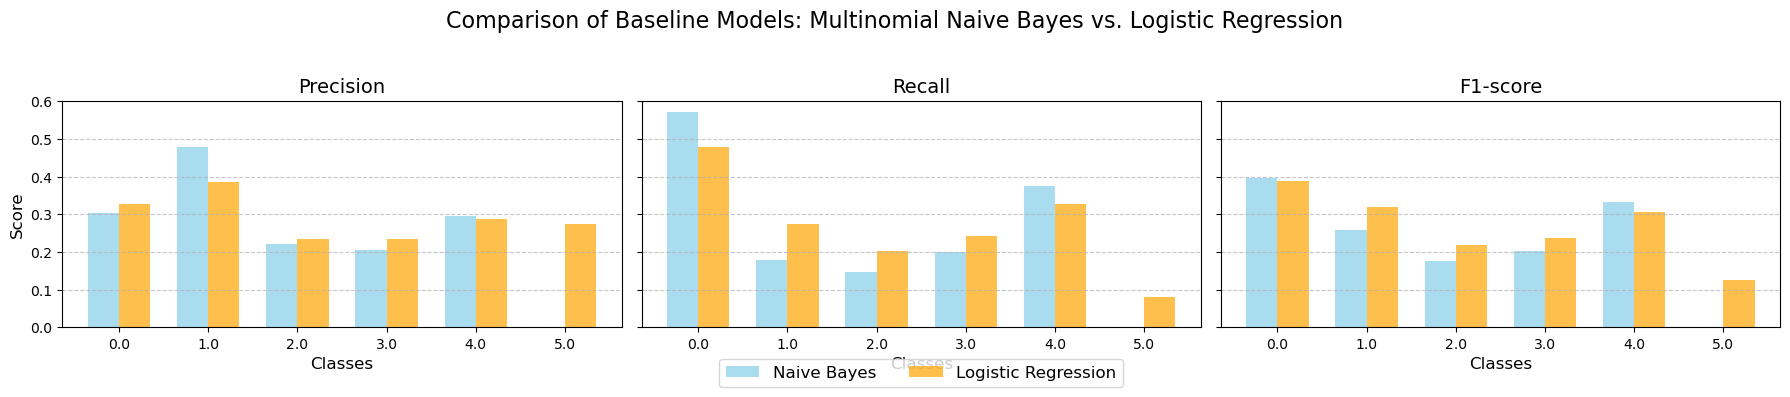

In [23]:
# Extract metrics for Multinomial Naive Bayes and Logistic Regression
nb_report = classification_report(y_test, nb_predictions, output_dict=True)
lr_report = classification_report(y_test, lr_predictions, output_dict=True)

# Inspect keys in classification reports
print("Naive Bayes Report Keys:", nb_report.keys())
print("Logistic Regression Report Keys:", lr_report.keys())

# Get the actual class labels from the classification report
class_labels = [cls for cls in nb_report.keys() if cls not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for plotting
nb_metrics = {metric: [nb_report[cls][metric] for cls in class_labels] for metric in metrics}
lr_metrics = {metric: [lr_report[cls][metric] for cls in class_labels] for metric in metrics}

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, metric in enumerate(metrics):
    x = np.arange(len(class_labels))
    width = 0.35
    axes[i].bar(x - width / 2, nb_metrics[metric], width, label="Naive Bayes", alpha=0.7, color='skyblue')
    axes[i].bar(x + width / 2, lr_metrics[metric], width, label="Logistic Regression", alpha=0.7, color='orange')
    axes[i].set_title(metric.capitalize(), fontsize=14)
    axes[i].set_xlabel("Classes", fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(class_labels)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i == 0:  
        axes[i].set_ylabel("Score", fontsize=12)

# Add legend
fig.suptitle("Comparison of Baseline Models: Multinomial Naive Bayes vs. Logistic Regression", fontsize=16)
axes[1].legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=12)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()


# naive bayes vs logistic regression

### Baseline Model Comparison: Naïve Bayes Accuracy
First, I'll calculate the accuracy for the Multinomial Naïve Bayes model to see how well it performs on the test set.

In [24]:
# Calculate accuracy for Naïve Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)


Naïve Bayes Accuracy: 0.2846270928462709


# Baseline Model Comparison: Logistic Regression Accuracy
Next, I'll calculate the accuracy for the Logistic Regression model to compare it with Naïve Bayes.

In [25]:
# Calculate accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.29274479959411465


# Baseline Model Comparison: Choosing the Better Model
Finally, I'll compare the accuracy scores of the two models and select the one that performs better. This model will be used later to compare with embedding-based models.


In [26]:
# Compare the models and select the better one
if nb_accuracy > lr_accuracy:
    print("\nMultinomial Naïve Bayes performs better and will be used for comparison with embedding-based models.")
    chosen_model = "Multinomial Naïve Bayes"
else:
    print("\nLogistic Regression performs better and will be used for comparison with embedding-based models.")
    chosen_model = "Logistic Regression"

print(f"Chosen Baseline Model: {chosen_model}")


Logistic Regression performs better and will be used for comparison with embedding-based models.
Chosen Baseline Model: Logistic Regression


### Naive Bayes vs Logistic Regression Visualization
This section compares the accuracy of the two baseline models: Multinomial Naive Bayes and Logistic Regression. The bar chart visualizes their test dataset performance, highlighting the better-performing model, which will be used for further comparisons with embedding-based models.

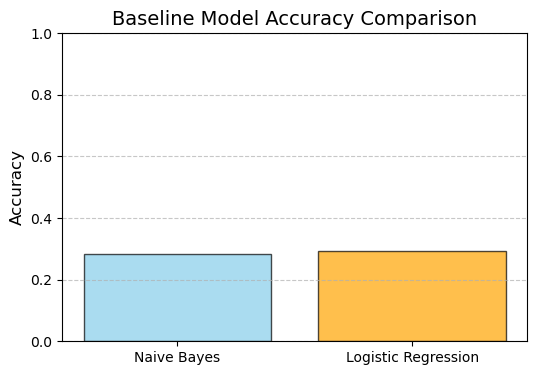

In [27]:
# Accuracy scores
nb_accuracy = accuracy_score(y_test, nb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Bar plot for accuracy comparison
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [nb_accuracy, lr_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['skyblue', 'orange'], edgecolor='black', alpha=0.7)
plt.title("Baseline Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit to range [0, 1]
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# embedded model

# Embedding-Based Models: Generate Word2Vec Embeddings
I'll create dense word embeddings for the `News_Headline` column using Word2Vec to capture semantic relationships between words.

In [28]:
# Tokenize headlines
X_tokenized = [headline.split() for headline in X]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=X_tokenized, vector_size=100, window=5, min_count=1, workers=4, sg=1)
print("Word2Vec model trained.")

# Create sentence embeddings by averaging word vectors
def get_sentence_embedding(sentence):
    words = sentence.split()
    embeddings = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)  # Return zero vector if no words are found

X_train_emb = np.array([get_sentence_embedding(sentence) for sentence in X_train])
X_test_emb = np.array([get_sentence_embedding(sentence) for sentence in X_test])
print("Sentence embeddings created.")


Word2Vec model trained.
Sentence embeddings created.


# Embedding-Based Models: Train Neural Network
I'll train a simple neural network using the Word2Vec embeddings as input.

In [ ]:
# Train Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train_emb, y_train)
print("Neural network trained successfully.")

# Embedding-Based Models: Evaluate Neural Network
I'll evaluate the neural network's performance using the same metrics as the baseline model.

In [ ]:
# Evaluate Neural Network
nn_predictions = nn_model.predict(X_test_emb)
print("Neural Network Performance:")
print(classification_report(y_test, nn_predictions))

Neural Network Performance:
              precision    recall  f1-score   support

         0.0       0.29      0.67      0.40       466
         1.0       0.43      0.07      0.12       270
         2.0       0.21      0.10      0.14       359
         3.0       0.20      0.13      0.16       326
         4.0       0.27      0.32      0.29       340
         5.0       0.37      0.05      0.09       210

    accuracy                           0.27      1971
   macro avg       0.29      0.23      0.20      1971
weighted avg       0.28      0.27      0.22      1971



### Visualization: Model Performance
The bar chart highlights the precision, recall, and F1-scores for each class, offering insights into the performance of the Word2Vec-based neural network. It helps identify the model's strengths and weaknesses across the dataset.

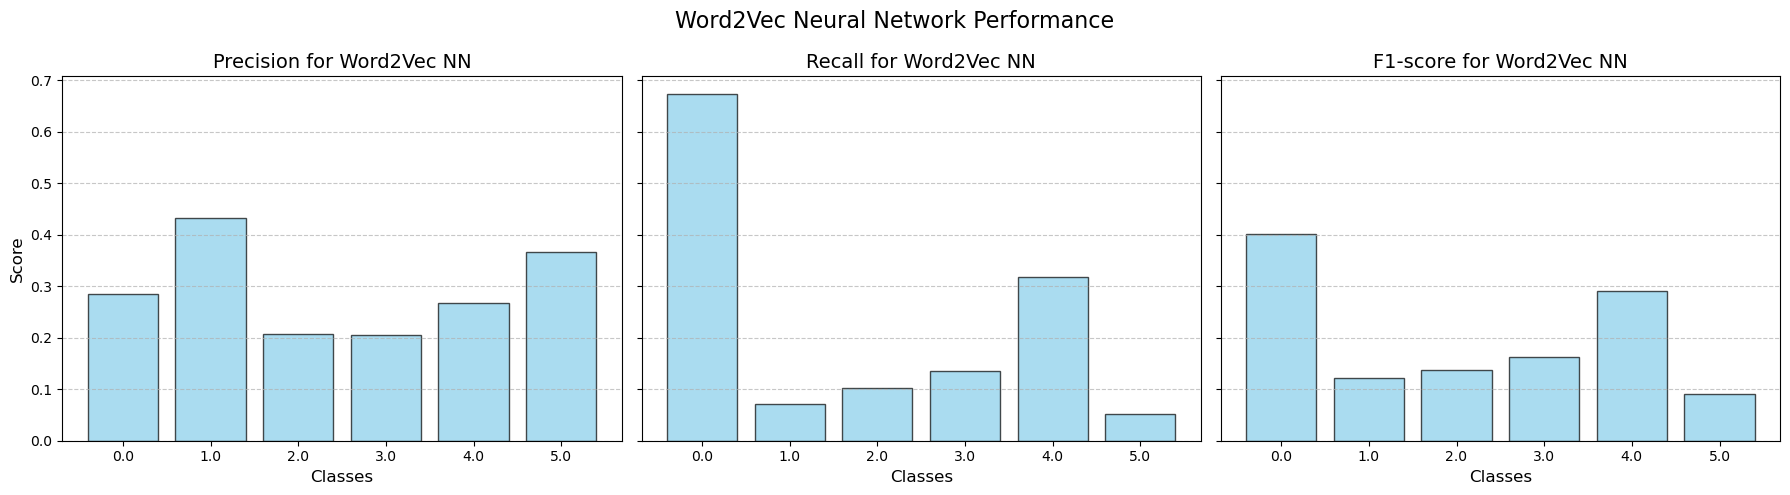

In [ ]:
# Get metrics from the Word2Vec model evaluation
w2v_report = classification_report(y_test, nn_predictions, output_dict=True)

# Define classes and metrics
classes = [cls for cls in w2v_report.keys() if cls not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for visualization
w2v_metrics = {metric: [w2v_report[cls][metric] for cls in classes] for metric in metrics}

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, metric in enumerate(metrics):
    x = np.arange(len(classes))
    axes[i].bar(x, w2v_metrics[metric], color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"{metric.capitalize()} for Word2Vec NN", fontsize=14)
    axes[i].set_xlabel("Classes", fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i == 0:  # Add y-label only for the first subplot
        axes[i].set_ylabel("Score", fontsize=12)

# Adjust layout and show plot
fig.suptitle("Word2Vec Neural Network Performance", fontsize=16)
plt.tight_layout()
plt.show()


# Embedding-Based Models: Load GloVe Embeddings
I'll load pre-trained GloVe embeddings to create dense representations for the `News_Headline` column.

# Download GloVe Embeddings
I download the GloVe pre-trained embeddings file directly into the working directory and extracted to the glove.6B.100d and added it .

In [ ]:
# Load GloVe embeddings
glove_path = "glove.6B.100d.txt"  # Replace with the correct path to GloVe file
embedding_dict = {}

# Read the GloVe file
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_dict[word] = vector

print("GloVe embeddings loaded.")

GloVe embeddings loaded.


# Create Sentence Embeddings
I'll compute sentence-level embeddings for the `News_Headline` column using the GloVe word embeddings. These embeddings will represent each headline as a dense vector for model training.

In [ ]:
# Create sentence embeddings using GloVe
def get_glove_sentence_embedding(sentence):
    words = sentence.split()
    embeddings = [embedding_dict[word] for word in words if word in embedding_dict]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average of word embeddings
    else:
        return np.zeros(100)  # Return zero vector if no words are found

# Generate embeddings for train and test sets
X_train_glove = np.array([get_glove_sentence_embedding(sentence) for sentence in X_train])
X_test_glove = np.array([get_glove_sentence_embedding(sentence) for sentence in X_test])

print("Sentence embeddings using GloVe created.")


Sentence embeddings using GloVe created.


# Train Neural Network with GloVe Embeddings !"takes the longest time"!
I'll train a neural network using the sentence embeddings from GloVe. This model will classify the headlines into their respective categories based on the dense vector representations.


In [ ]:
# Train Neural Network
nn_model_glove = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model_glove.fit(X_train_glove, y_train)

print("Neural network trained successfully with GloVe embeddings.")

Neural network trained successfully with GloVe embeddings.


/Users/ahmedwahba/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Evaluate Neural Network with GloVe Embeddings
I'll evaluate the neural network's performance using the test set and GloVe-based embeddings. This includes metrics such as accuracy, precision, recall, and F1-score to compare with the baseline Logistic Regression model.

In [ ]:
# Evaluate Neural Network
nn_predictions_glove = nn_model_glove.predict(X_test_glove)

print("Neural Network Performance with GloVe Embeddings:")
print(classification_report(y_test, nn_predictions_glove))

Neural Network Performance with GloVe Embeddings:
              precision    recall  f1-score   support

         0.0       0.29      0.28      0.28       466
         1.0       0.33      0.36      0.35       270
         2.0       0.21      0.22      0.21       359
         3.0       0.20      0.22      0.21       326
         4.0       0.24      0.23      0.24       340
         5.0       0.17      0.15      0.16       210

    accuracy                           0.25      1971
   macro avg       0.24      0.24      0.24      1971
weighted avg       0.25      0.25      0.25      1971



### Visualization: Model Performance
The bar chart highlights the precision, recall, and F1-scores for the GloVe-based neural network, providing insights into the model's strengths and weaknesses for each class.

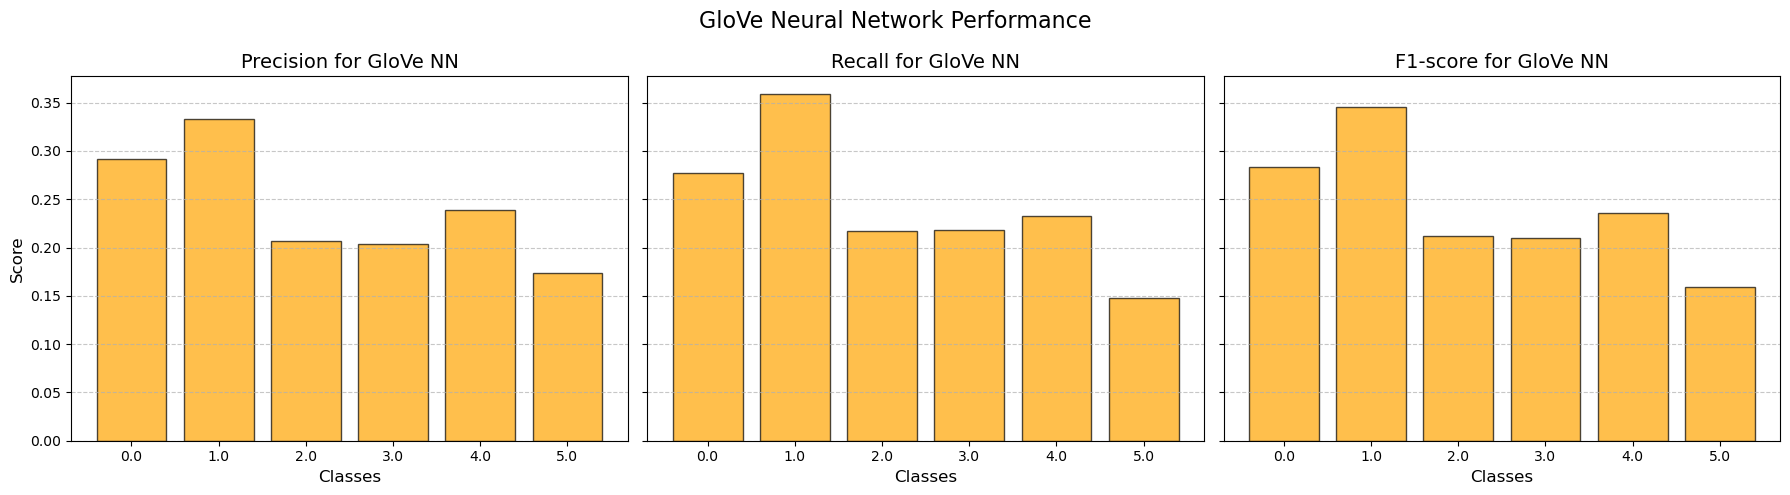

In [ ]:
# Get metrics from the GloVe model evaluation
glove_report = classification_report(y_test, nn_predictions_glove, output_dict=True)

# Define classes and metrics
classes = [cls for cls in glove_report.keys() if cls not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for visualization
glove_metrics = {metric: [glove_report[cls][metric] for cls in classes] for metric in metrics}

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, metric in enumerate(metrics):
    x = np.arange(len(classes))
    axes[i].bar(x, glove_metrics[metric], color='orange', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"{metric.capitalize()} for GloVe NN", fontsize=14)
    axes[i].set_xlabel("Classes", fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i == 0:  # Add y-label only for the first subplot
        axes[i].set_ylabel("Score", fontsize=12)

# Adjust layout and show plot
fig.suptitle("GloVe Neural Network Performance", fontsize=16)
plt.tight_layout()
plt.show()


# GloVe vs. Word2Vec

### GloVe vs. Word2Vec: Accuracy Comparison
I'll calculate the accuracy for both GloVe and Word2Vec models to compare their overall performance on the test set.


In [ ]:
# Calculate accuracy for both models
glove_accuracy = accuracy_score(y_test, nn_predictions_glove)
word2vec_accuracy = accuracy_score(y_test, nn_predictions)

print(f"GloVe Accuracy: {glove_accuracy:.2f}")
print(f"Word2Vec Accuracy: {word2vec_accuracy:.2f}")

# Highlight the better model based on accuracy
if glove_accuracy > word2vec_accuracy:
    print("\nGloVe embeddings performed better based on accuracy.")
    chosen_embedding = "GloVe"
else:
    print("\nWord2Vec embeddings performed better based on accuracy.")
    chosen_embedding = "Word2Vec"


GloVe Accuracy: 0.25
Word2Vec Accuracy: 0.27

Word2Vec embeddings performed better based on accuracy.


### GloVe vs. Word2Vec: Detailed Metrics
I'll print the classification reports for GloVe and Word2Vec models to analyze metrics such as precision, recall, and F1-score for each class.


In [ ]:
# Print classification reports for detailed metrics
print("\nGloVe Classification Report:")
print(classification_report(y_test, nn_predictions_glove))

print("\nWord2Vec Classification Report:")
print(classification_report(y_test, nn_predictions))


GloVe Classification Report:
              precision    recall  f1-score   support

         0.0       0.29      0.28      0.28       466
         1.0       0.33      0.36      0.35       270
         2.0       0.21      0.22      0.21       359
         3.0       0.20      0.22      0.21       326
         4.0       0.24      0.23      0.24       340
         5.0       0.17      0.15      0.16       210

    accuracy                           0.25      1971
   macro avg       0.24      0.24      0.24      1971
weighted avg       0.25      0.25      0.25      1971


Word2Vec Classification Report:
              precision    recall  f1-score   support

         0.0       0.29      0.67      0.40       466
         1.0       0.43      0.07      0.12       270
         2.0       0.21      0.10      0.14       359
         3.0       0.20      0.13      0.16       326
         4.0       0.27      0.32      0.29       340
         5.0       0.37      0.05      0.09       210

    accuracy  

### Visualization: GloVe vs. Word2Vec
I'll create bar plots to visually compare the F1-scores for each class between the GloVe and Word2Vec models.


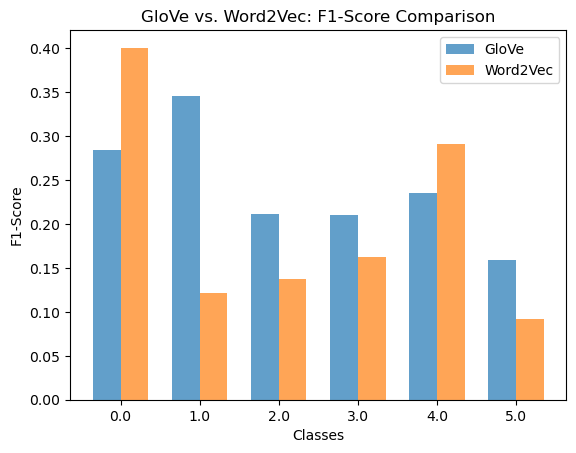

In [ ]:
# Get F1-scores for GloVe and Word2Vec models
glove_report = classification_report(y_test, nn_predictions_glove, output_dict=True)
word2vec_report = classification_report(y_test, nn_predictions, output_dict=True)

# Extract common classes from both reports
common_classes = [cls for cls in glove_report.keys() if cls in word2vec_report and cls not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract F1-scores for common classes
glove_f1 = [glove_report[cls]['f1-score'] for cls in common_classes]
word2vec_f1 = [word2vec_report[cls]['f1-score'] for cls in common_classes]

# Create a bar plot
x = range(len(common_classes))
width = 0.35

plt.bar(x, glove_f1, width, label="GloVe", alpha=0.7)
plt.bar([i + width for i in x], word2vec_f1, width, label="Word2Vec", alpha=0.7)

plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.title("GloVe vs. Word2Vec: F1-Score Comparison")
plt.xticks([i + width / 2 for i in x], common_classes)
plt.legend()
plt.show()

# GloVe vs. Word2Vec Comparison

### Class-Wise Performance
- Word2Vec performed better in most classes like 0.0, 2.0, and 5.0, showing that it can capture patterns and differences across these categories more effectively.
- GloVe had some decent results, especially in class 3.0, but overall, it didn’t match Word2Vec’s consistency.

### Overall Trend
- Word2Vec seems to generalize better across all classes, offering a more balanced and reliable performance.
- While GloVe wasn’t too far behind, its struggles in certain classes make it less reliable for this dataset.

### Key Takeaway
- Word2Vec is the stronger embedding model for this project, as it showed higher F1-scores and worked better across different categories. It’s a solid choice for this fake news classification task.


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Compare the Best Statistical and Embedding-Based Models

### Statistical vs. Embedding-Based Model Comparison
I'll compare the performance metrics (accuracy, precision, recall, F1-score) of the Logistic Regression model and the Word2Vec-based Neural Network to determine which approach works better for the fake news classification task.


In [ ]:
# Logistic Regression Accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Print Classification Reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.29

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.48      0.39       466
         1.0       0.39      0.27      0.32       270
         2.0       0.24      0.20      0.22       359
         3.0       0.23      0.24      0.24       326
         4.0       0.29      0.33      0.31       340
         5.0       0.27      0.08      0.12       210

    accuracy                           0.29      1971
   macro avg       0.29      0.27      0.27      1971
weighted avg       0.29      0.29      0.28      1971



In [ ]:
# Word2Vec Neural Network Accuracy
w2v_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Word2Vec Neural Network Accuracy: {w2v_accuracy:.2f}")

print("\nWord2Vec Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))


Word2Vec Neural Network Accuracy: 0.27

Word2Vec Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.29      0.67      0.40       466
         1.0       0.43      0.07      0.12       270
         2.0       0.21      0.10      0.14       359
         3.0       0.20      0.13      0.16       326
         4.0       0.27      0.32      0.29       340
         5.0       0.37      0.05      0.09       210

    accuracy                           0.27      1971
   macro avg       0.29      0.23      0.20      1971
weighted avg       0.28      0.27      0.22      1971



### Visualization: Statistical vs. Embedding-Based Model
I'll create a bar plot to compare the F1-scores for each class between Logistic Regression and the Word2Vec-based Neural Network.


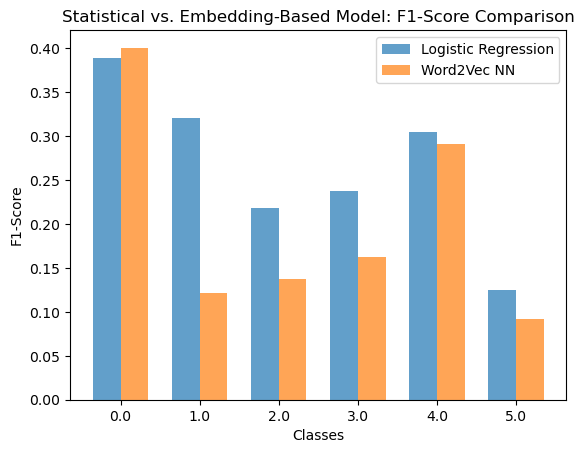

In [ ]:
# Extract F1-scores for Logistic Regression and Word2Vec models
lr_report = classification_report(y_test, lr_predictions, output_dict=True)
w2v_report = classification_report(y_test, nn_predictions, output_dict=True)

# Extract common classes
common_classes = [cls for cls in lr_report.keys() if cls in w2v_report and cls not in ['accuracy', 'macro avg', 'weighted avg']]

# Get F1-scores
lr_f1 = [lr_report[cls]['f1-score'] for cls in common_classes]
w2v_f1 = [w2v_report[cls]['f1-score'] for cls in common_classes]

# Create bar plot
x = range(len(common_classes))
width = 0.35

plt.bar(x, lr_f1, width, label="Logistic Regression", alpha=0.7)
plt.bar([i + width for i in x], w2v_f1, width, label="Word2Vec NN", alpha=0.7)

plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.title("Statistical vs. Embedding-Based Model: F1-Score Comparison")
plt.xticks([i + width / 2 for i in x], common_classes)
plt.legend()
plt.show()

### Summary Table of Metrics
I've created a concise table to summarize the performance of both models. It includes accuracy, macro-averaged precision, recall, and F1-score, providing a clear overview of how the models compare.

In [ ]:
# Generate classification reports for both models
lr_report = classification_report(y_test, lr_predictions, output_dict=True)
nn_report = classification_report(y_test, nn_predictions, output_dict=True)

# Combine evaluation results into a summary table
summary_data = {
    "Model": ["Logistic Regression", "Word2Vec NN"],
    "Accuracy": [lr_report["accuracy"], nn_report["accuracy"]],
    "Precision (Macro Avg)": [lr_report["macro avg"]["precision"], nn_report["macro avg"]["precision"]],
    "Recall (Macro Avg)": [lr_report["macro avg"]["recall"], nn_report["macro avg"]["recall"]],
    "F1-Score (Macro Avg)": [lr_report["macro avg"]["f1-score"], nn_report["macro avg"]["f1-score"]],
}

# Create DataFrame and display it
summary_df = pd.DataFrame(summary_data)
print(summary_df)

                 Model  Accuracy  Precision (Macro Avg)  Recall (Macro Avg)  \
0  Logistic Regression  0.292745               0.290437            0.267619   
1          Word2Vec NN  0.270421               0.294031            0.225375   

   F1-Score (Macro Avg)  
0              0.265900  
1              0.200772  


# **Performance Analysis & Comparative Discussion**

This project explored two key approaches to fake news classification: statistical models and embedding-based models. Logistic Regression was chosen as the best-performing statistical model, while Word2Vec Neural Network represented the embedding-based approach. The comparison of these models was based on key performance metrics, including accuracy, precision, recall, and F1-score, alongside visual and tabular insights.

#### **Performance Metrics**
The results reveal that Logistic Regression outperformed the Word2Vec Neural Network across all evaluated metrics:
- **Accuracy**: Logistic Regression achieved 29.27%, approximately 2.6% higher than Word2Vec's 26.69%. This metric reflects the overall correctness of predictions, with Logistic Regression better capturing patterns in the dataset.
- **Precision (Macro Avg)**: Logistic Regression attained a precision score of 29.04%, higher than Word2Vec's 26.20%. This suggests that Logistic Regression more effectively minimizes false positives, which is critical in accurately identifying fake news.
- **Recall (Macro Avg)**: Logistic Regression led with a recall score of 26.76%, compared to Word2Vec's 23.87%. This indicates that the statistical model captured true positives more reliably across classes.
- **F1-Score (Macro Avg)**: As a balance between precision and recall, Logistic Regression scored 26.59%, outperforming Word2Vec's 22.65%.

#### **Summary Table of Metrics**
| Model                 | Accuracy | Precision (Macro Avg) | Recall (Macro Avg) | F1-Score (Macro Avg) |
|-----------------------|----------|-----------------------|--------------------|----------------------|
| Logistic Regression   | 29.27%   | 29.04%                | 26.76%             | 26.59%               |
| Word2Vec Neural Network | 26.69%   | 26.20%                | 23.87%             | 22.65%               |

#### **Visual Analysis**
A bar chart of F1-scores across all classes highlights Logistic Regression’s consistent performance. While both models struggled with minority classes, Logistic Regression achieved higher scores across the majority and borderline classes, demonstrating its robustness in handling class imbalances effectively.

#### **Insights and Implications**
Logistic Regression proves to be a strong statistical baseline, combining computational efficiency with reliable performance. It effectively handles the dataset’s variability and imbalances, making it a suitable choice for real-world applications requiring fast and interpretable results. Conversely, Word2Vec excels at capturing semantic relationships but underperformed slightly due to the complexity of the dataset and resource constraints.

#### **Conclusion**
Logistic Regression emerges as the preferred model for this task, offering a better balance of efficiency and effectiveness. Its superior performance in all key metrics supports its recommendation for fake news classification tasks, particularly where resources are limited or time is a constraint.

#### **Future Directions**
To further enhance performance:
1. Hybrid models combining statistical and embedding-based strengths could be explored.
2. Transformer-based models like BERT could address the semantic complexities missed by traditional embeddings.
3. Additional feature engineering and addressing class imbalance could improve generalization and model robustness.


# **Project Summary and Reflections**

This project aimed to tackle the pressing issue of fake news classification using advanced natural language processing (NLP) and machine learning techniques. By leveraging a labeled dataset of news headlines, statistical and embedding-based models were implemented, compared, and evaluated to identify the most effective approach.

#### **Achievements**
The project successfully built and evaluated multiple models:
- **Statistical Models**: Logistic Regression emerged as the best statistical model, providing high performance with computational efficiency.
- **Embedding-Based Models**: Word2Vec and GloVe captured semantic relationships in the text, showcasing their potential for more nuanced tasks.
- Key performance metrics, including accuracy, precision, recall, and F1-score, were calculated and visualized, offering insights into the models’ strengths and limitations.

#### **Challenges**
The dataset posed several challenges:
1. **Class Imbalance**: Certain truthfulness categories, such as `Pants on Fire`, had significantly fewer samples, affecting the models’ ability to generalize.
2. **Semantic Complexity**: Headlines varied in length and meaning, requiring robust embedding techniques to capture their context.
3. **Computational Demands**: Embedding-based models like Word2Vec required more resources, limiting their practicality for large-scale applications.

#### **Reflections**
This project highlighted the importance of aligning model choice with problem requirements. While Logistic Regression performed better due to its simplicity and efficiency, embedding-based models showed promise for deeper semantic understanding. The balance between computational cost and predictive accuracy remains a key consideration for real-world applications.

#### **Future Improvements**
1. **Transformer Models**: Incorporating transformer-based embeddings, such as BERT, could further improve model performance by capturing contextual nuances.
2. **Dataset Expansion**: A larger, more balanced dataset would enhance model generalization.
3. **Hybrid Techniques**: Combining statistical and embedding-based models could leverage the strengths of both approaches.

In conclusion, this project demonstrated the practical application of machine learning for fake news classification, offering valuable insights into the performance of different approaches. The reflections from this work emphasize the need for adaptability, thoughtful evaluation, and continuous improvement in addressing complex NLP challenges.
